##K-Nearest Neighbor(KNN)##

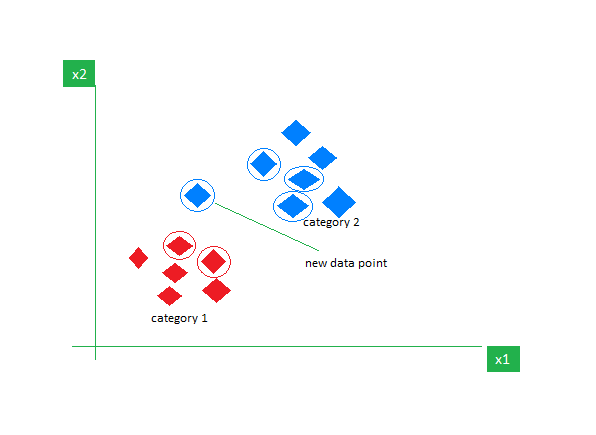

**Importing Libraries and Dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
!wget https://raw.githubusercontent.com/valixonov04/DATA/refs/heads/main/prostate.csv

--2025-01-03 16:11:45--  https://raw.githubusercontent.com/valixonov04/DATA/refs/heads/main/prostate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6205 (6.1K) [text/plain]
Saving to: ‘prostate.csv’

prostate.csv        100%[===================>]   6.06K  --.-KB/s    in 0s      

2025-01-03 16:11:45 (58.0 MB/s) - ‘prostate.csv’ saved [6205/6205]



In [25]:
df = pd.read_csv("prostate.csv")
df.head()


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Target', axis=1))
scaled_features = scaler.transform(df.drop('Target', axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


In [32]:
from sklearn.metrics import classification_report,\
	confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df.Target,test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[19  3]
 [ 3  5]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.62      0.62      0.62         8

    accuracy                           0.80        30
   macro avg       0.74      0.74      0.74        30
weighted avg       0.80      0.80      0.80        30



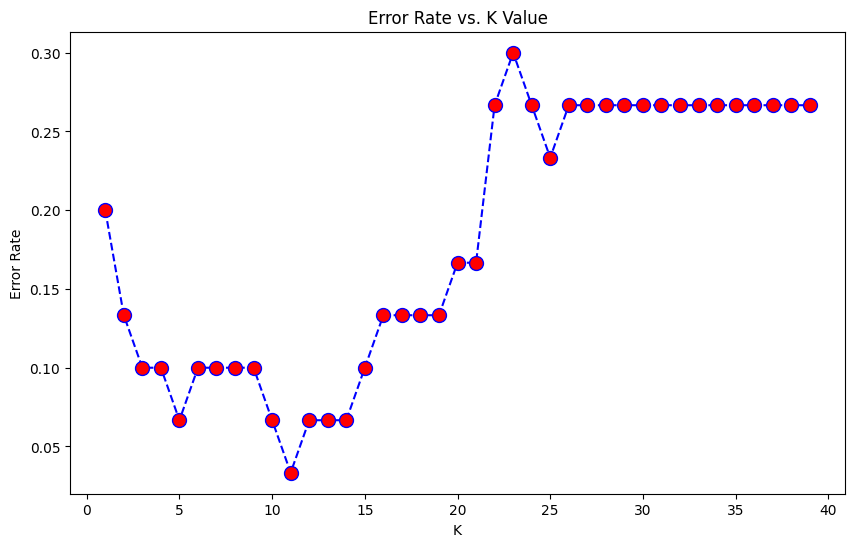

In [33]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [35]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 1
Confusion Matrix
[[19  3]
 [ 3  5]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.62      0.62      0.62         8

    accuracy                           0.80        30
   macro avg       0.74      0.74      0.74        30
weighted avg       0.80      0.80      0.80        30



In [36]:
# NOW WITH K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 10
Confusion Matrix
[[21  1]
 [ 1  7]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30

